In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('/home/bureevda/Documents/datascience/ml_kaggle/competitions/houses/train.csv')
# train_df = pd.read_csv(r'C:\Users\danila.bureev\Documents\ml\houses\train.csv')

In [3]:
test_df = pd.read_csv('/home/bureevda/Documents/datascience/ml_kaggle/competitions/houses/test.csv')
# test_df = pd.read_csv(r'C:\Users\danila.bureev\Documents\ml\houses\test.csv')

# Вступление
Ознакомимся с данными, над которыми предстоит работа:

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Краткое описание признаков, взятое из описания датасета:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Проверим наличие дубликатов в данных:

In [8]:
train_df.Id.duplicated().sum()

0

Удалим явно не информативную колонку "Id":

In [9]:
train_df.drop(columns=['Id'], inplace=True)
y_test_id = test_df.Id
test_df.drop(columns=['Id'], inplace=True)

Проверим самую очевидные зависимости - между площадью участка дома и ценой, а также между жилой площадью и ценой:

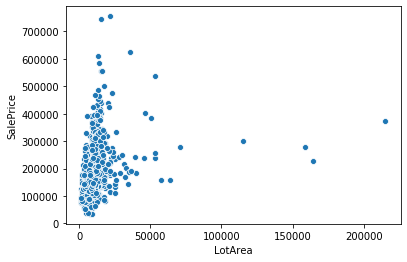

In [10]:
sns.scatterplot(x=train_df.LotArea, y=train_df.SalePrice)

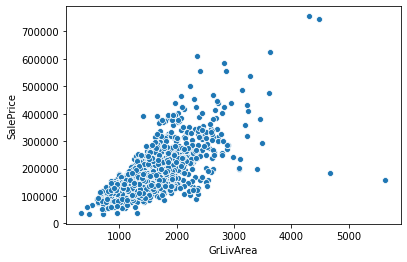

In [11]:
sns.scatterplot(x=train_df.GrLivArea, y=train_df.SalePrice)

Заметим, что в данных явно присутствуют выбросы. 
Автор датасета рекомендует удалить все записи, жилая площадь в которых превышает 4000 (ссылка: https://ww2.amstat.org/publications/jse/v19n3/decock.pdf). Согласно графику, таких всего 4, избавимся от них:

In [12]:
train_df = train_df[train_df.GrLivArea < 4000]

In [13]:
train_df.shape # Проверим, что удалено было 4 записи

(1456, 80)

Выделим целевую переменную и, так как в качестве оценки качества модели будет применяться RSME между логарифмами предсказанных и истинных значений (ссылка: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation), прологарифмируем ее:

In [14]:
y_train = np.log1p(train_df.SalePrice)

In [15]:
train_df.drop(columns=['SalePrice'], inplace=True)

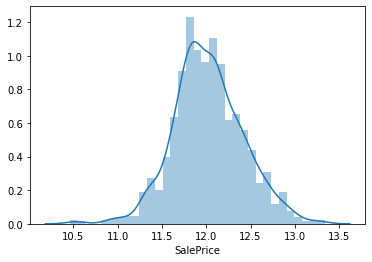

In [16]:
sns.distplot(y_train)

Заметим, что после преобразования целевой переменной, ее распределение близко к нормальному.

# Feature Engineering

1. Отчистим данные от выбросов
2. Заполним отсутствующие в записях значения
3. Выделение новых признаков
4. Трансформируем некоторые переменные, которые, будучи числовыми или текстовыми, являются категориальными
5. Выполним LabelEncoding
6. Приведение числовых признаков к нормальному распределению
7. Для категориальных признаков выполним onehot encoding

## 1. Поиск аномалий в данных

In [17]:
# Выделим категориальные признаки, согласно описанию датасета:
train_df.select_dtypes(object).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
categorical_features = train_df.select_dtypes(object).columns

In [19]:
train_df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [20]:
categorical_features = categorical_features.append(pd.Index(['MSSubClass', 'MoSold', 'YrSold', 'OverallQual', \
                                                             'OverallCond'
                                                            ])
                                                  )

In [21]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold', 'YrSold',
       'OverallQual', 'OverallCond'],
      dtype='object')

In [22]:
numeric_features = set(train_df.columns) - set(categorical_features)
features_to_clean = numeric_features

In [23]:
features_to_clean

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd'}

In [24]:
# удалим GrLivArea из списка, так как мы уже удалили аномалии согласно данной колонке,руководствуясь описанием
    # данных
features_to_clean.remove('GrLivArea')

In [25]:
train_df.BedroomAbvGr.value_counts()

3    802
2    358
4    211
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [26]:
features_to_clean.remove('BedroomAbvGr')

In [27]:
train_df.BsmtFullBath.value_counts()

0    855
1    586
2     14
3      1
Name: BsmtFullBath, dtype: int64

In [28]:
train_df.BsmtHalfBath.value_counts()

0    1375
1      79
2       2
Name: BsmtHalfBath, dtype: int64

In [29]:
features_to_clean.remove('BsmtFullBath')
features_to_clean.remove('BsmtHalfBath')

In [30]:
train_df.Fireplaces.value_counts()

0    690
1    649
2    113
3      4
Name: Fireplaces, dtype: int64

In [31]:
features_to_clean.remove('Fireplaces')

In [32]:
train_df.FullBath.value_counts()

2    767
1    650
3     30
0      9
Name: FullBath, dtype: int64

In [33]:
features_to_clean.remove('FullBath')

In [34]:
train_df.GarageCars.value_counts()

2    823
1    369
3    178
0     81
4      5
Name: GarageCars, dtype: int64

In [35]:
features_to_clean.remove('GarageCars')

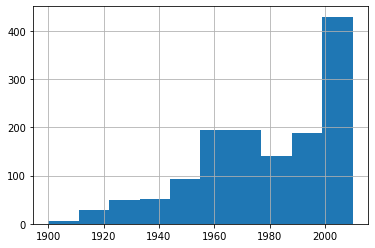

In [36]:
train_df.GarageYrBlt.hist()

In [37]:
features_to_clean.remove('GarageYrBlt')

In [38]:
train_df.HalfBath.value_counts()

0    913
1    531
2     12
Name: HalfBath, dtype: int64

In [39]:
features_to_clean.remove('HalfBath')

In [40]:
train_df.KitchenAbvGr.value_counts()

1    1388
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [41]:
features_to_clean.remove('KitchenAbvGr')

In [42]:
train_df.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     45
11     17
3      17
12     10
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [43]:
features_to_clean.remove('TotRmsAbvGrd')

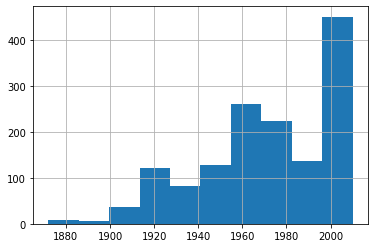

In [44]:
train_df.YearBuilt.hist()

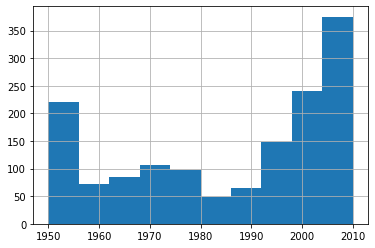

In [45]:
train_df.YearRemodAdd.hist()

In [46]:
features_to_clean.remove('YearBuilt')
features_to_clean.remove('YearRemodAdd')

Зададим очень высокий трешхолд для определения записи как аномалии:

In [47]:
treshold = 10

In [48]:
for col in features_to_clean:
    out = len(train_df[(train_df[col] > train_df[col].mean() + treshold*train_df[col].std()) |
         (train_df[col] < train_df[col].mean() - treshold*train_df[col].std())])
    print(f'{col}:\t{out}')

GarageArea:	0
WoodDeckSF:	0
3SsnPorch:	4
PoolArea:	5
ScreenPorch:	0
LotFrontage:	1
MiscVal:	2
EnclosedPorch:	0
1stFlrSF:	0
BsmtFinSF1:	0
OpenPorchSF:	0
2ndFlrSF:	0
MasVnrArea:	0
TotalBsmtSF:	0
LotArea:	4
LowQualFinSF:	5
BsmtUnfSF:	0
BsmtFinSF2:	0


Посмотрим, как данные, в которых есть сильно отклоняющиеся от среднего значения, коррелируют с целевой переменной:

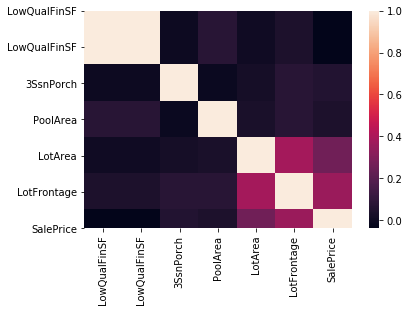

In [49]:
sns.heatmap(train_df.assign(SalePrice=y_train.to_list()).loc[:, ['LowQualFinSF', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 
                                  'LotArea', 'LotFrontage', 'SalePrice']].corr())

Заметим, что данные признаки имеют очень слабую корреляцию с целевой переменной. Мы можем оставить обнаруженные ранее выделяющиеся записи.

## 2. Заполнение отсутствующих значений

Прежде чем приступить к преобразованию наших данных, временно объединим train и test датасеты, чтобы не дублировать операции:

In [50]:
all_df = pd.concat((train_df, test_df), sort=False).reset_index(drop=True)

In [51]:
all_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2911,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2912,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2913,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [52]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [53]:
all_df.isna().sum()[all_df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2717
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2907
Fence           2345
MiscFeature     2810
SaleType           1
dtype: int64

In [54]:
for col in all_df.isna().sum()[all_df.isna().sum()>0].index:
    print(all_df[col].describe())
    print()

count     2911
unique       5
top         RL
freq      2261
Name: MSZoning, dtype: object

count    2429.00000
mean       69.12886
std        22.71544
min        21.00000
25%        59.00000
50%        68.00000
75%        80.00000
max       313.00000
Name: LotFrontage, dtype: float64

count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object

count       2913
unique         2
top       AllPub
freq        2912
Name: Utilities, dtype: object

count        2914
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

count        2914
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object

count     2891
unique       4
top       None
freq      1741
Name: MasVnrType, dtype: object

count    2892.000000
mean      101.399378
std       177.452915
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     2834
uniq

Заполним отсутствующие значения:

In [55]:
all_df.MSZoning.fillna(all_df.MSZoning.mode()[0], inplace=True)

In [56]:
all_df.LotFrontage.fillna(all_df.LotFrontage.mean(), inplace=True)

In [57]:
# Согласно описанию данных, NA в Alley означает, что доступа нет
all_df.Alley.fillna('None', inplace=True)

In [58]:
all_df.Utilities.value_counts()

AllPub    2912
NoSeWa       1
Name: Utilities, dtype: int64

In [59]:
all_df[all_df.Utilities == 'NoSeWa']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
942,20,RL,69.12886,14375,Pave,None,IR1,Lvl,NoSeWa,CulDSac,...,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml


Заметим, что единственное значение 'NoSeWa' в Utilities находится в train_df, это не поможет предсказать нам значения на тесте, следовательно мы можем безопасно удалить данную фичу:

In [60]:
all_df.drop(columns='Utilities', inplace=True)

In [61]:
all_df.Exterior1st.fillna(all_df.Exterior1st.mode()[0], inplace=True)

In [62]:
all_df.Exterior2nd.fillna(all_df.Exterior2nd.mode()[0], inplace=True)

In [63]:
all_df.MasVnrType.fillna(all_df.MasVnrType.mode()[0], inplace=True)

In [64]:
all_df.MasVnrArea.value_counts()

0.0       1737
120.0       15
200.0       13
176.0       13
180.0       12
          ... 
1290.0       1
532.0        1
322.0        1
251.0        1
217.0        1
Name: MasVnrArea, Length: 441, dtype: int64

In [65]:
all_df[all_df.MasVnrArea.isnull()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
528,NaN,None
649,NaN,None
934,NaN,None
971,NaN,None
975,NaN,None
1240,NaN,None
1275,NaN,None
1687,NaN,None
1702,NaN,None


In [66]:
all_df.MasVnrArea.fillna(0, inplace=True)

Заметим, что с фундаментом связано 11 признаков:

1. BsmtQual
2. BsmtCond
3. BsmtExposure
4. BsmtFinType1
5. BsmtFinSF1
6. BsmtFinType2
7. BsmtFinSF2
8. BsmtUnfSF
9. TotalBsmtSF
10. BsmtFullBath
11. BsmtHalfBath

In [67]:
pd.set_option('display.max_rows', 100)

In [68]:
# 1
all_df[all_df.BsmtQual.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
342,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


 Заметим, что в данных присутствуют аномалии: дома 2206 и 2207 имеют фундамент, слудовательно NaN в BsmtQual - ошибка. Исправим сначала это, после чего продолжим заполнять отсутствующие значения.

In [69]:
all_df.loc[[2206, 2207], 'BsmtQual'] = pd.Series([all_df[all_df.BsmtCond=='Fa'].BsmtQual.mode()[0], 
                                                  all_df[all_df.BsmtCond=='TA'].BsmtQual.mode()[0]])

In [70]:
# NaN в BsmtQual означает, что фундамента у дома нет, заменим NaN на None
all_df.BsmtQual.fillna('None', inplace=True)

In [71]:
# 2
all_df[all_df.BsmtCond.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
39,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
90,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
102,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
156,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
182,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
259,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
342,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
362,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
371,None,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


Заметим, что в данных присутствуют аномалии: дома 2029, 2174 и 2513 имеют фундамент, слудовательно NaN в BsmtCond - ошибка. Исправим сначала это, после чего продолжим заполнять отсутствующие значения.

In [72]:
all_df.loc[[2029, 2174, 2513], 'BsmtCond'] = pd.Series([all_df[all_df.BsmtQual=='Gd'].BsmtCond.mode()[0], 
                                                        all_df[all_df.BsmtQual=='TA'].BsmtCond.mode()[0], 
                                                        all_df[all_df.BsmtQual=='TA'].BsmtCond.mode()[0]])

In [73]:
# NaN в BsmtQual означает, что фундамента у дома нет, заменим NaN на None
all_df.BsmtCond.fillna('None', inplace=True)

In [74]:
# 3
all_df[all_df.BsmtExposure.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
39,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
90,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
102,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
156,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
182,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
259,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
342,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
362,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0
371,None,None,NaN,NaN,0.0,NaN,0.0,0.0,0.0


Заметим, что в данных присутствуют аномалии: дома 939, 1476 и 2337 имеют фундамент, слудовательно NaN в BsmtExposure - ошибка. Исправим сначала это, после чего продолжим заполнять отсутствующие значения.

In [75]:
all_df.loc[[939, 1476, 2337], 'BsmtExposure'] = pd.Series([[all_df[all_df.BsmtQual=='Gd'].BsmtExposure.mode()[0] 
                                                           for _ in range(3)]])

In [76]:
# NaN в BsmtExposure означает, что фундамента у дома нет, заменим NaN на None
all_df.BsmtExposure.fillna('None', inplace=True)

In [77]:
# 4
all_df[all_df.BsmtFinType1.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
39,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
90,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
102,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
156,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
182,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
259,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
342,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
362,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0
371,None,None,None,NaN,0.0,NaN,0.0,0.0,0.0


In [78]:
# NaN в BsmtFinType1 означает, что фундамента у дома нет, заменим NaN на None
all_df.BsmtFinType1.fillna('None', inplace=True)

In [79]:
# 5
all_df[all_df.BsmtFinSF1.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2116,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [80]:
all_df.BsmtFinSF1.fillna(0, inplace=True)

In [81]:
# 6
all_df[all_df.BsmtFinType2.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,None,None,None,None,0.0,NaN,0.0,0.0,0.0
39,None,None,None,None,0.0,NaN,0.0,0.0,0.0
90,None,None,None,None,0.0,NaN,0.0,0.0,0.0
102,None,None,None,None,0.0,NaN,0.0,0.0,0.0
156,None,None,None,None,0.0,NaN,0.0,0.0,0.0
182,None,None,None,None,0.0,NaN,0.0,0.0,0.0
259,None,None,None,None,0.0,NaN,0.0,0.0,0.0
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0
342,None,None,None,None,0.0,NaN,0.0,0.0,0.0
362,None,None,None,None,0.0,NaN,0.0,0.0,0.0


In [82]:
# # 6
# all_df[(all_df.BsmtFinType2.isnull()) & 
#        ~((all_df[all_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']] == 'None'].any(axis=1)) | 
#          (all_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']].isnull().any(axis=1)))
#       ][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
#          'BsmtUnfSF', 'TotalBsmtSF']]

Заметим, что в данных присутствует аномалия: дом 328 имеет фундамент, слудовательно NaN в BsmtFinType2 - ошибка. Исправим сначала это, после чего продолжим заполнять отсутствующие значения.

In [83]:
all_df.loc[328, 'BsmtFinType2'] = all_df[all_df.BsmtQual=='Gd'].BsmtFinType2.mode()[0]

In [84]:
# NaN в BsmtFinType2 означает, что фундамента у дома нет, заменим NaN на None
all_df.BsmtFinType2.fillna('None', inplace=True)

In [85]:
# 7
all_df[all_df.BsmtFinSF2.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2116,None,None,None,None,0.0,None,NaN,NaN,NaN


In [86]:
all_df.BsmtFinSF2.fillna(0, inplace=True)

In [87]:
# 8
all_df[all_df.BsmtUnfSF.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2116,None,None,None,None,0.0,None,0.0,NaN,NaN


In [88]:
all_df.BsmtUnfSF.fillna(0, inplace=True)

In [89]:
# 9
all_df[all_df.TotalBsmtSF.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2116,None,None,None,None,0.0,None,0.0,0.0,NaN


In [90]:
all_df.TotalBsmtSF.fillna(0, inplace=True)

In [91]:
# 10, 11
all_df[all_df.BsmtFullBath.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2116,None,None,None,None,0.0,None,0.0,0.0,0.0,NaN,NaN
2184,None,None,None,None,0.0,None,0.0,0.0,0.0,NaN,NaN


In [92]:
all_df.fillna({'BsmtFullBath': 'None', 'BsmtHalfBath': 'None'}, inplace=True)

Заполнение NA значений признаков, связанных с фундаментом закончено. Продолжим заполнять отсутствующие значения в данных:

In [93]:
all_df.Electrical.fillna(all_df.Electrical.mode()[0], inplace=True)

In [94]:
all_df.Electrical.isna().sum()

0

In [95]:
all_df[all_df.KitchenQual.isnull()][['KitchenAbvGr', 'KitchenQual']]

,KitchenAbvGr,KitchenQual
1551,1,NaN


In [96]:
all_df.KitchenQual.fillna(all_df.KitchenQual.mode()[0], inplace=True)

In [97]:
all_df.Functional.fillna('Typ', inplace=True)

In [98]:
all_df[all_df.FireplaceQu.isnull()]['Fireplaces'].value_counts()

0    1420
Name: Fireplaces, dtype: int64

In [99]:
# NaN в FireplaceQu означает, что каминов в доме нет, заменим NaN на None
all_df.FireplaceQu.fillna('None', inplace=True)

Заметим, что с гаражем связано 7 признаков:

1. GarageType
2. GarageYrBlt
3. GarageFinish
4. GarageCars
5. GarageArea
6. GarageQual
7. GarageCond

In [100]:
all_df[all_df.GarageType.isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
                                    'GarageQual', 'GarageCond']].nunique()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      1
GarageArea      1
GarageQual      0
GarageCond      0
dtype: int64

Заметим, что все данные строки содержат исключительно значения NaN для категориальных и 0 для числовых признаков. Следовательно, гаража ни в одном из этих домов нет, заполним отсутствующие значения 'None' и 0 соответственно:

In [101]:
all_df.loc[all_df.GarageType.isnull(), :] = all_df[all_df.GarageType.isnull()].fillna({
    'GarageType': 'None',
    'GarageFinish': 'None',
    'GarageQual': 'None',
    'GarageCond': 'None',
    'GarageYrBlt': 0,
    'GarageArea': 0,
    'GarageCars': 0
})

Посмотрим, сколько NaN-значений осталось в данных колонках:

In [102]:
all_df.loc[:, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt',
                                       'GarageArea', 'GarageCars']].isna().sum()

GarageType      0
GarageFinish    2
GarageQual      2
GarageCond      2
GarageYrBlt     2
GarageArea      1
GarageCars      1
dtype: int64

In [103]:
all_df[all_df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt',
                                       'GarageArea', 'GarageCars']].isna().any(axis=1)] \
    [['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageArea', 'GarageCars']]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageArea,GarageCars
2122,Detchd,NaN,NaN,NaN,NaN,360.0,1.0
2572,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


Заметим, что в домах 2122 и 2572 нет гаражей по одним данным, но есть, судя по другим. Предположим, что в 2122 гараж есть, так как несколько признаков говорят об этом. В 2572 же предположим обратное, так как только GarageType содержит значение. 

In [104]:
all_df.loc[2122, ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']] = \
    [all_df[all_df.GarageType == 'Detchd'].GarageFinish.mode()[0], 
     all_df[all_df.GarageType == 'Detchd'].GarageQual.mode()[0],
     all_df[all_df.GarageType == 'Detchd'].GarageCond.mode()[0],
     int(all_df[all_df.GarageType == 'Detchd'].GarageYrBlt.mean())
    ]
all_df.loc[2572, 'GarageType'] = 'None'

In [105]:
all_df.fillna({'GarageFinish': 'None',
               'GarageQual': 'None',
               'GarageCond': 'None',
               'GarageYrBlt': 0,
               'GarageArea': 0,
               'GarageCars': 0
               }, inplace=True)

In [106]:
train_df.shape # Проверим, что удалено было 4 записи

(1456, 79)

In [107]:
all_df.GarageCond.value_counts()

TA      2651
None     158
Fa        74
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64

In [108]:
all_df.GarageCond == 'TA'

0        True
1        True
2        True
3        True
4        True
        ...  
2910    False
2911     True
2912     True
2913    False
2914     True
Name: GarageCond, Length: 2915, dtype: bool

In [109]:
all_df[all_df.PoolQC.isnull()].PoolArea.value_counts()

0      2904
561       1
444       1
368       1
Name: PoolArea, dtype: int64

In [110]:
all_df.PoolArea.mean() + 3*all_df.PoolArea.std()

100.96162284469985

Заметим, что значения 368, 444, 561 не входят в 99% доверительный интервал, будем считать их аномалиями и заменим на 0, согласно со значением PoolQC:

In [111]:
all_df.fillna({'PoolQC': 'None', 'PoolArea': 0}, inplace=True)

In [112]:
all_df.fillna({'Fence': 'None', 'MiscFeature': 'None'}, inplace=True)

In [113]:
all_df[all_df.SaleType.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2485,20,RL,85.0,13770,Pave,None,Reg,Lvl,Corner,Gtl,...,0,0,None,None,None,0,10,2007,NaN,Normal


In [114]:
all_df.loc[2485, 'SaleType'] = all_df[all_df.SaleCondition == 'Normal'].SaleType.mode()[0]

In [115]:
all_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## 3. Добавление новых фичей

In [116]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']

## 4. Трансформация числовых признаков в категориальные

In [117]:
all_df.MSSubClass = all_df.MSSubClass.astype(str)
all_df.OverallCond = all_df.OverallCond.astype(str)
all_df.OverallQual = all_df.OverallQual.astype(str)
all_df.MoSold = all_df.MoSold.astype(str)
all_df.YrSold = all_df.YrSold.astype(str)

## 5. Label encoding

Выделим категориальные признаки, в которых есть какая-то градация, которая может быть определена рядом чисел:

In [118]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold', 'YrSold',
       'OverallQual', 'OverallCond'],
      dtype='object')

In [119]:
features_to_le = ['MSSubClass', 'Street', 'Alley', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', \
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', \
                  'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', \
                  'PoolQC', 'Fence', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond'
                 ]

In [120]:
from sklearn import preprocessing
for col in features_to_le:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(list(all_df[col].values))
    all_df[col] = label_encoder.transform(all_df[col].values.tolist())

## 6. Приведение числовых признаков к нормальному распределению

In [121]:
num_features = all_df.dtypes[all_df.dtypes != 'object'].index
skews = pd.DataFrame({'Skews': all_df[num_features].apply(lambda x: x.skew())})

In [122]:
# смещение для числовых признаков
skews.sort_values(by='Skews', ascending=False).head(10)

,Skews
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535
3SsnPorch,11.373947
LandSlope,4.973910
KitchenAbvGr,4.301059
BsmtFinSF2,4.144996
EnclosedPorch,4.002856
ScreenPorch,3.945539


Прологарифмируем числовые признаки, чтобы приблизить распределение признаков к нормальному, воспользовавшись boxcox1p функцией из scipy:

In [123]:
from scipy.special import boxcox1p 
for col in skews.index:
    lam = 0.15
    all_df[col] = boxcox1p(all_df[col], lam)

## 7. One hot encoding

In [124]:
all_df = pd.get_dummies(all_df)

# Выделим из объединенного датасета первоначальные обучающую и тестовую выборки:

In [125]:
train_df.shape

(1456, 79)

In [126]:
test_df.shape

(1459, 79)

In [127]:
y_train.shape

(1456,)

In [128]:
all_df.shape

(2915, 227)

In [129]:
train = all_df[:len(train_df)]
test = all_df[len(train_df):]

In [130]:
train.shape

(1456, 227)

In [131]:
test.shape

(1459, 227)

# baseline

## Модели

Изначально возьмем Elastic-Net regression, Gradient Boosting, SVR и XGBoosting, подберем близкие к оптимальным параметры и посмотрим на результаты на кросс валидации. 

### Elastic-Net Regression

Заметим, что модель может быть очень чувствительна к аутлайерам, добавим RobustScaller перед ее обучением.

In [188]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [523]:
enet_cv = ElasticNetCV(l1_ratio=np.append(np.arange(.1, .5, .1), np.arange(.49, .99, .05)), 
                                              alphas=np.arange(0.0001, 0.001, 0.0001), cv=10, max_iter=10000)

In [139]:
enet_cv_pipeline = make_pipeline(RobustScaler(), enet_cv)

In [140]:
%%time
enet_cv_pipeline.fit(train.values, y_train)

CPU times: user 39.6 s, sys: 470 ms, total: 40 s
Wall time: 10 s


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                              copy_X=True, cv=10, eps=0.001, fit_intercept=True,
                              l1_ratio=array([0.1 , 0.2 , 0.3 , 0.4 , 0.49, 0.54, 0.59, 0.64, 0.69, 0.74, 0.79,
       0.84, 0.89, 0.94]),
                              max_iter=10000, n_alphas=100, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=False)

In [141]:
enet = make_pipeline(RobustScaler(), ElasticNet(l1_ratio=enet_cv_pipeline['elasticnetcv'].l1_ratio_, 
                                                alpha=enet_cv_pipeline['elasticnetcv'].alpha_))

In [142]:
%%time
enet.fit(train.values, y_train)

CPU times: user 601 ms, sys: 11.8 ms, total: 613 ms
Wall time: 154 ms


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0004, copy_X=True, fit_intercept=True,
                            l1_ratio=0.8900000000000003, max_iter=1000,
                            normalize=False, positive=False, precompute=False,
                            random_state=None, selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

### Gradient Boosting Regressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
gb_cv_parameters = {
    'n_estimators': [2500, 4000],
    'learning_rate': np.arange(0.01, 0.051, 0.01),
    'max_depth': range(4, 9, 2),
    'min_samples_split': range(5, 41 , 5),
    'min_samples_leaf': range(1, 21, 4)
}

In [167]:
# Зададим функцию потерь huber для большей робастности
gb_cv = RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_distributions=gb_cv_parameters, 
                           scoring='neg_mean_squared_log_error', cv=10, n_jobs=-1)

In [146]:
%%time
gb_cv.fit(train.values, y_train)

CPU times: user 27.5 s, sys: 27.1 ms, total: 27.5 s
Wall time: 26min 20s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='huber',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                      

In [147]:
gb = gb_cv.best_estimator_

In [148]:
gb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='huber', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=40,
                          min_weight_fraction_leaf=0.0, n_estimators=2500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## SVR

In [190]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

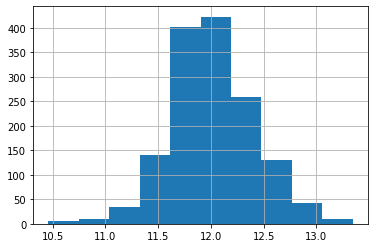

In [269]:
y_train.hist()

In [312]:
svr_cv_parameters = {
    'C': np.arange(5, 20, 0.5),
    'epsilon': np.arange(0.01, 0.1, 0.005)
}

In [313]:
svr_cv = GridSearchCV(SVR(gamma='scale', cache_size=400), param_grid=svr_cv_parameters, scoring='neg_mean_squared_log_error', 
                      cv=10, n_jobs=-1)

In [314]:
%%time
svr_cv.fit(train.values, y_train)

CPU times: user 24.3 s, sys: 787 ms, total: 25.1 s
Wall time: 11min 40s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=400, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
       16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
                         'epsilon': array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [315]:
svr = svr_cv.best_estimator_

In [316]:
svr

SVR(C=14.0, cache_size=400, coef0=0.0, degree=3, epsilon=0.045, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## XGBoost

In [330]:
from xgboost.sklearn import XGBRegressor

In [417]:
xgb_cv_parameters = {
    'gamma': np.arange(0.001, 0.01, 0.002),
    'colsample_bytree': np.arange(0.1, 0.21, 0.02),
    'reg_lambda': [0.96, 0.97, 0.98]
}

In [419]:
xgb_cv = GridSearchCV(XGBRegressor(booster='gbtree', n_estimators=2000, max_depth=4, learning_rate=0.025, 
                                         silent=1, nthread=-1, reg_alpha=0.006, subsample=0.5, min_child_weight=2),
    param_grid=xgb_cv_parameters, scoring='neg_mean_squared_log_error', cv=10, n_jobs=-1)

In [420]:
%%time
xgb_cv.fit(train.values, y_train)

CPU times: user 9.62 s, sys: 123 ms, total: 9.74 s
Wall time: 22min 5s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.025, max_delta_step=None,
                                    max_depth=4, min_child_weight=2,
                                    missing=nan, monotone_constrain...
                                    silent=1, subsample=0.5, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
                         'gamma': array([0.0

In [421]:
xgb = xgb_cv.best_estimator_

In [422]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.16000000000000003,
             gamma=0.001, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.025,
             max_delta_step=0, max_depth=4, min_child_weight=2, missing=nan,
             monotone_constraints=None, n_estimators=2000, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0.006, reg_lambda=0.96,
             scale_pos_weight=1, silent=1, subsample=0.5, tree_method=None,
             validate_parameters=False, verbosity=None)

## CV score

In [500]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def cv_score(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse = np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=kf, n_jobs=-1))
    return rmse

In [501]:
cv_score(enet).mean()

0.11535678810370402

In [152]:
cv_score(gb).mean()

0.1208578940230954

In [317]:
cv_score(svr).mean()

0.12140069566418103

In [423]:
cv_score(xgb).mean()

0.11292220637563503

# Усредненная модель

## Усреднение предсказаний baseline-моделей

In [153]:
# Создадим класс для усредненной модели
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
class AverageModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models: list):
        self.models = models
    
    def fit(self, X_train, y_train):
        for model in self.models:
            model.fit(X_train, y_train)
        return self
    
    def predict(self, X_test):
        return np.mean([model.predict(X_test) for model in self.models], axis=0)

In [551]:
avg_model = AverageModel([enet, gb, svr, xgb])

In [552]:
avg_model.fit(train, y_train)

AverageModel(models=[Pipeline(memory=None,
                              steps=[('robustscaler',
                                      RobustScaler(copy=True,
                                                   quantile_range=(25.0, 75.0),
                                                   with_centering=True,
                                                   with_scaling=True)),
                                     ('elasticnet',
                                      ElasticNet(alpha=0.0004, copy_X=True,
                                                 fit_intercept=True,
                                                 l1_ratio=0.8900000000000003,
                                                 max_iter=1000, normalize=False,
                                                 positive=False,
                                                 precompute=False,
                                                 random_state=None,
                                                 selection='c

## CV

In [553]:
cv_score(avg_model).mean()

0.11006850322098494

# Использование мета-модели

## Класс и обучение

In [528]:
from sklearn.base import clone


class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index, :], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index, :])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [548]:
stacked_avg_model = StackingAveragedModels([enet, xgb, gb, svr], enet_cv)

In [549]:
stacked_avg_model.fit(train, y_train)

StackingAveragedModels(base_models=[Pipeline(memory=None,
                                             steps=[('robustscaler',
                                                     RobustScaler(copy=True,
                                                                  quantile_range=(25.0,
                                                                                  75.0),
                                                                  with_centering=True,
                                                                  with_scaling=True)),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0004,
                                                                copy_X=True,
                                                                fit_intercept=True,
                                                                l1_ratio=0.8900000000000003,
                                              

## CV

In [550]:
%%time
cv_score(stacked_avg_model).mean()

CPU times: user 154 ms, sys: 226 ms, total: 380 ms
Wall time: 2min 59s


0.10969134190705203

# Предсказание целевой переменной

In [559]:
# Получим предсказания на тестовой выборке:
y_pred_1, y_pred_2, y_pred_3 = np.expm1(stacked_avg_model.predict(test)), np.expm1(avg_model.predict(test)), \
    np.expm1(xgb.predict(test))

In [560]:
y_pred = 0.8*y_pred_1 + 0.15*y_pred_2 + 0.05*y_pred_3

In [561]:
result_df = pd.DataFrame({'Id': y_test_id, 
                          'SalePrice': y_pred}).set_index('Id')

In [562]:
result_df.to_csv('prediction_file.csv')